# ch05.04. 기초모델 구현 - Perceptron
---
* 날짜: 2022-05-15
* 이름: 고민수

## 학습내용
    - 이진 분류 개념에 대해 이해한다.
    - Perceptron의 프로세스를 이해한다 
    - Perceptron 알고리즘을 구현한다.

```
import numpy as np
import matplotlib.pyplot as plt
```

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 데이트 로더
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
  
def mpg_loader(test_size=0.2, rs=1):
    df = sns.load_dataset('mpg')
    print('===== 데이터 확인 ====')
    print('* shape: ',df.shape)
    print(df.head())

    print('===== 범주 자료 제거 ====')
    df = df.drop(['origin', 'name'], axis=1)
    print('* shape: ',df.shape)

    print('===== 결측치 제거 ====')
    df = df.dropna(axis=0)
    print('* shape: ',df.shape)

    print('===== 정규화 ====')
    df=df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
    print(df.head())

    print('===== 넘파이 변환 ====')
    ds = df.to_numpy()
    X, y = ds[:, 1:], ds[:, 0]
    print(X.shape, y.shape)

    print('===== 데이터 분할 ====')

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=rs)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test



from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def iris_loader(c_1, c_not1, test_size=0.2, rs=1):
    iris = load_iris()
    X = iris.data
    y = iris.target

    X = X[y!=2]
    y = y[y!=2]
    y = np.where(y==1, c_1, c_not1)
    print(X.shape, y.shape, X[0], y[0])

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=rs)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

## 클래스 작성
---

In [23]:
class Perceptron():
    def __init__(self, lr=0.001, random_state=1):
        self.lr=lr
        self.seed = np.random.RandomState(random_state)

    def init_weights(self, X):
        size = X.shape[1]
        self.w = self.seed.normal(0,0.01,size = (size+1,))   # np.random.normal(location(위치), 편차, size = size)

    def model(self, X):
        return np.dot(X, self.w[:-1]) + self.w[-1] # 편향(bias) 전 w값들과 X의 내적 + bias의 값

    def predict(self, X):
        y_hat = self.model(X)
        logit = np.where(y_hat >= 0.5, 1, 0)
        return logit

    def loss(self, y, y_logit):
        return np.abs(y-y_logit)    

    def accuracy(self, y, y_logit):
        return np.count_nonzero(y==y_logit)/len(y)

    def evaluate(self, X, y):
        y_logit = self.predict(X)
        loss = self.loss(y,y_logit)
        loss = loss.sum()/len(y)
        acc = self.accuracy(y,y_logit)
        return loss, acc

    def fit(self, X, y, epochs=10, show_params=False):
        
        self.init_weights(X) # 가중치 초기화
        self.history=dict(loss=[], acc=[]) # history 초기화

        for epoch in range(epochs):    
        # 최적화
            for xi,yi in zip(X,y) :
                y_logit = self.predict(xi)
                self.w[:-1] += self.lr*(yi-y_logit)*xi
                self.w[-1] += self.lr*(yi-y_logit)  # bias(b) 값
                
        # 평가 및 결과 저장
        loss, acc = self.evaluate(X, y)
        self.history['loss'].append(loss)
        self.history['acc'].append(acc)
        print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
        if show_params: print(self.w)

    # 데이터 흐름 시각화
    def draw_dflow(self, X, y, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)

        y_hat = self.model(X)
        y_pred = self.predict(X)
        plt.plot(y, label='y', marker='o')
        plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
        plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
        plt.legend()
        plt.show()

    # 학습 곡선 시각화
    def draw_lcurve(self, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(self.history['acc'], label='acc', marker='o')
        plt.plot(self.history['loss'], label='loss', marker='o')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()

## Iris 데이터로 분류 진행
---

### **데이터 로드**

In [24]:
X_train, X_test, y_train, y_test = iris_loader(1, 0)

(100, 4) (100,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

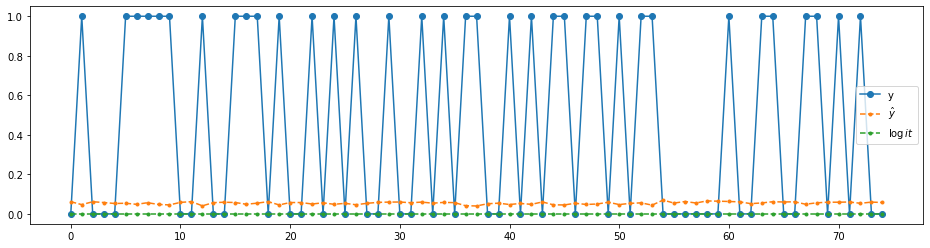

In [25]:
model = Perceptron()

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **학습**

In [26]:
history = model.fit(X_train, y_train, epochs=10000, show_params=False)

[Epoch 9999] loss: 0.0  acc: 1.0


### **학습 후 성능평가**

성능:  (0.0, 1.0)


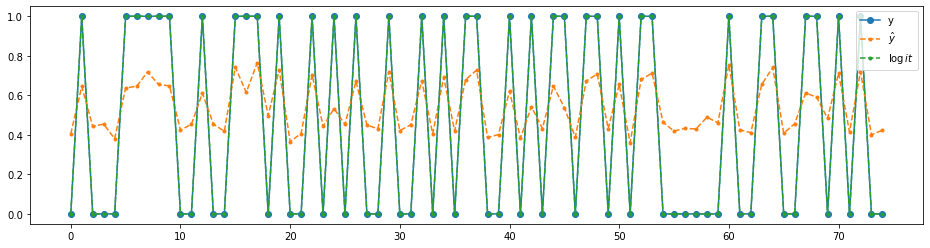

In [27]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **학습곡선**

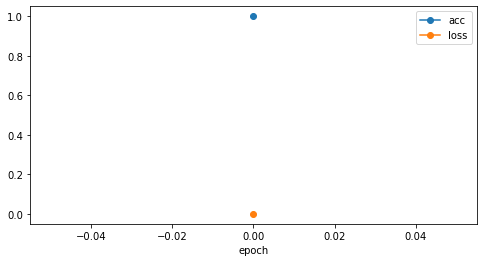

In [28]:
model.draw_lcurve()

### **테스트셋 성능평가**

성능:  (0.0, 1.0)


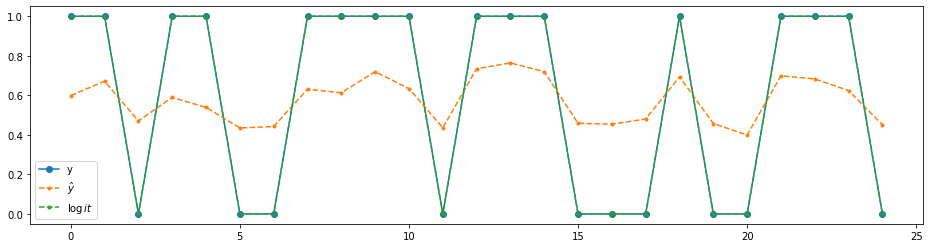

In [29]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **하이퍼파라미터에 따른 성능평가**

In [30]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = Perceptron(lr=lr)
  history = model.fit(X_train, y_train, epochs=10)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 9] loss: 0.47  acc: 0.53
===== lr 1e-05 ==== (0.6, 0.4)
[Epoch 9] loss: 0.05  acc: 0.95
===== lr 0.0001 ==== (0.04, 0.96)
[Epoch 9] loss: 0.0  acc: 1.0
===== lr 0.001 ==== (0.0, 1.0)
[Epoch 9] loss: 0.0  acc: 1.0
===== lr 0.01 ==== (0.0, 1.0)
[Epoch 9] loss: 0.0  acc: 1.0
===== lr 0.1 ==== (0.0, 1.0)
